# Analyze Product Sentiment

In [47]:
import turicreate

# Read product review data

In [48]:
products= turicreate.SFrame('amazon_baby.sframe')

# Explore data

In [49]:
products

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0


In [9]:
products.groupby('name',operations={'count':turicreate.aggregate.COUNT()}).sort('count',ascending=False)

name,count
Vulli Sophie the GiraffeTeether ...,785
"Simple Wishes Hands-FreeBreastpump Bra, Pink, ...",562
Infant Optics DXR-5 2.4GHz Digital Video Baby ...,561
Baby Einstein Take AlongTunes ...,547
Cloud b TwilightConstellation Night ...,520
"Fisher-Price BoosterSeat, Blue/Green/Gray ...",489
Fisher-Price RainforestJumperoo ...,450
"Graco Nautilus 3-in-1 CarSeat, Matrix ...",419
Leachco Snoogle TotalBody Pillow ...,388
"Regalo Easy Step WalkThru Gate, White ...",374


In [18]:
# products['word_count']= turicreate.text_analytics.count_words(products['review'])

In [23]:
# products

In [14]:
# products['name'].show()

# Examine the reivews for the most-reviewed product

In [50]:
giraffe_reviews=products[products['name'] == 'Vulli Sophie the Giraffe Teether']

In [20]:
giraffe_reviews

name,review,rating,word_count
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'and': 1.0, 'all': 1.0,'because': 1.0, 'it': ..."
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'and': 1.0, 'right':1.0, 'help': 1.0, 'ju ..."
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'and': 2.0, 'all': 1.0,'being': 1.0, 'caused': ..."
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'and': 2.0, 'all': 1.0,'love': 1.0, 'have': ..."
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'and': 3.0, 'all': 1.0,'old': 1.0, 'almost': ..."
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'and': 6.0, 'seven':1.0, 'already': 1.0, ..."
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'and': 4.0, 'drooling':1.0, 'additionally': ..."
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'and': 3.0, 'chew': 1.0,'sweet': 1.0, 'is': 1.0, ..."
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'chew': 2.0, 'because':1.0, 'just': 2.0, 'fe ..."
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3.0,"{'and': 2.0, 'already':1.0, 'in': 1.0, 'some': ..."


In [17]:
len(giraffe_reviews)

785

In [24]:
giraffe_reviews['rating'].show()

Materializing SArray

# Building a sentiment classifier

## Build word count vectors

In [51]:
products['word_count'] = turicreate.text_analytics.count_words(products['review'])

In [52]:
products

name,review,rating,word_count
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0,"{'and': 5.0, 'stink':1.0, 'months': 1.0, ..."
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'and': 3.0, 'love': 1.0,'it': 3.0, 'highly': ..."
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'and': 2.0, 'quilt':1.0, 'it': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'and': 3.0, 'ingenious':1.0, 'love': 2.0, 'is': ..."
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'and': 2.0, 'this': 2.0,'all': 2.0, 'love': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'and': 2.0, 'cute': 1.0,'help': 2.0, 'habit': ..."
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'shop': 1.0, 'be': 1.0,'is': 1.0, 'bound': 1.0, ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'and': 2.0, 'all': 1.0,'right': 1.0, 'able': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'and': 1.0, 'fantastic':1.0, 'help': 1.0, 'gi ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'pre': 1.0, 'all': 1.0,'standarad': 1.0, ..."


# Define what is positive and negative sentiment

In [27]:
products['rating'].show()

Materializing SArray

In [53]:
#ignore all 3*  reviews
products = products[products['rating']!= 3]

In [54]:
#positive sentiment = 4-star or 5-star reviews
products['sentiments']= products['rating']>= 4

In [55]:
products

name,review,rating,word_count,sentiments
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'and': 3.0, 'love': 1.0,'it': 3.0, 'highly': ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'and': 2.0, 'quilt':1.0, 'it': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'and': 3.0, 'ingenious':1.0, 'love': 2.0, 'is': ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'and': 2.0, 'this': 2.0,'all': 2.0, 'love': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'and': 2.0, 'cute': 1.0,'help': 2.0, 'habit': ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'shop': 1.0, 'be': 1.0,'is': 1.0, 'bound': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'and': 2.0, 'all': 1.0,'right': 1.0, 'able': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'and': 1.0, 'fantastic':1.0, 'help': 1.0, 'gi ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'pre': 1.0, 'all': 1.0,'standarad': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'all': 2.0, 'forget':1.0, 'just': 1.0, 'fo ...",1


In [59]:
products['sentiments'].show()

Materializing SArray

# Train our sentiment classifier

In [60]:
train_data,test_data=products.random_split(.8,seed=0)

In [61]:
sentiment_model = turicreate.logistic_classifier.create(train_data,target='sentiments',features=['word_count'],validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 57356

Number of coefficients      : 57357

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 0.972431     | 0.841421          | 0.840019            |

| 1         | 9        | 3.250000  | 2.208648     | 0.931359          | 0.911362            |

| 2         | 11       | 2.669978  | 2.842980     | 0.938650          | 0.916466            |

| 3         | 12       | 2.669978  | 3.261642     | 0.927417          | 0.901814            |

| 4         | 14       | 1.326072  | 3.965152     | 0.945200          | 0.918088            |

| 9         | 20       | 1.326072  | 6.285615     | 0.977654          | 0.917698            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [62]:
roc = sentiment_model.evaluate(test_data)



In [63]:
roc

{'accuracy': 0.9176975738650012,
 'auc': 0.9342357833151299,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |  1397 |
 |      1       |        0        |  1344 |
 |      0       |        0        |  3931 |
 |      1       |        1        | 26632 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.951057941255245,
 'log_loss': 0.33047871872321205,
 'precision': 0.9501587641371436,
 'recall': 0.9519588218472976,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+----------------+----------------+-------+------+
 | threshold |      fpr       |      tpr       |   p   |  n   |
 +-----------+----------------+----------------+-------+------+
 |    0.0    |      1.0       | 

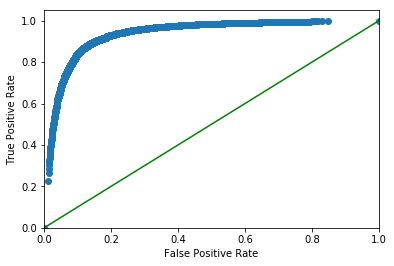

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(roc['roc_curve']['fpr'],
            roc['roc_curve']['tpr'],  
            label='ROC Curve')
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Apply the sentiment classifier to better understand the Giraffe reviews

In [64]:
products['predicted_sentiment'] = sentiment_model.predict(products, output_type = 'probability')

In [65]:
products

name,review,rating,word_count,sentiments
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'and': 3.0, 'love': 1.0,'it': 3.0, 'highly': ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'and': 2.0, 'quilt':1.0, 'it': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'and': 3.0, 'ingenious':1.0, 'love': 2.0, 'is': ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'and': 2.0, 'this': 2.0,'all': 2.0, 'love': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'and': 2.0, 'cute': 1.0,'help': 2.0, 'habit': ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'shop': 1.0, 'be': 1.0,'is': 1.0, 'bound': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'and': 2.0, 'all': 1.0,'right': 1.0, 'able': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'and': 1.0, 'fantastic':1.0, 'help': 1.0, 'gi ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'pre': 1.0, 'all': 1.0,'standarad': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'all': 2.0, 'forget':1.0, 'just': 1.0, 'fo ...",1


In [66]:
diaper_champ_reviews = products[products['name']== 'Baby Trend Diaper Champ']

In [67]:
diaper_champ_reviews

name,review,rating,word_count,sentiments
Baby Trend Diaper Champ,Ok - newsflash. Diapersare just smelly. We've ...,4.0,"{'just': 2.0, 'less':1.0, 'mainly': 1.0, ...",1
Baby Trend Diaper Champ,"My husband and I selectedthe Diaper ""Champ"" ma ...",1.0,"{'selected': 1.0, 'just':1.0, 'less': 1.0, 'wh ...",0
Baby Trend Diaper Champ,Excellent diaper disposalunit. I used it in ...,5.0,"{'control': 1.0, 'am':1.0, 'it': 1.0, 'in': ...",1
Baby Trend Diaper Champ,We love our diaper champ.It is very easy to use ...,5.0,"{'and': 3.0, 'all': 1.0,'love': 1.0, 'just': ...",1
Baby Trend Diaper Champ,Two girlfriends and twofamily members put me ...,5.0,"{'help': 1.0, 'just':1.0, 'keep': 1.0, 'bo ...",1
Baby Trend Diaper Champ,I waited to review thisuntil I saw how it ...,4.0,"{'lysol': 1.0, 'all':1.0, 'perfect': 1.0, ...",1
Baby Trend Diaper Champ,I have had a diaper geniefor almost 4 years since ...,1.0,"{'all': 1.0, 'just': 2.0,'saver': 1.0, 'years': ...",0
Baby Trend Diaper Champ,I originally put thisitem on my baby registry ...,5.0,"{'lysol': 1.0, 'all':4.0, 'feedback': 1.0, ...",1
Baby Trend Diaper Champ,I am so glad I got theDiaper Champ instead of ...,5.0,"{'and': 2.0, 'all': 1.0,'just': 1.0, 'is': 2.0, ...",1
Baby Trend Diaper Champ,We had 2 diaper Genie'sboth given to us as a ...,4.0,"{'rating': 1.0, 'messy':1.0, 'before': 1.0, ...",1


# Sort the Giraffe reviews according to predicted sentiment

In [68]:
diaper_champ_reviews=diaper_champ_reviews.sort('predicted_sentiment',ascending=False)

In [69]:
diaper_champ_reviews

name,review,rating,word_count,sentiments
Baby Trend Diaper Champ,I read a review belowthat can explain exactly ...,4.0,"{'and': 3.0, 'exactly':1.0, 'stink': 1.0, 've': ...",1
Baby Trend Diaper Champ,I have never written areview for Amazon but I ...,5.0,"{'shop': 2.0, 'holds':1.0, 'they': 3.0, 'tip': ...",1
Baby Trend Diaper Champ,I originally put thisitem on my baby registry ...,5.0,"{'lysol': 1.0, 'all':4.0, 'feedback': 1.0, ...",1
Baby Trend Diaper Champ,Baby Luke can turn aclean diaper to a dirty ...,5.0,"{'all': 1.0, 'less': 1.0,'nursery': 1.0, 'smel ...",1
Baby Trend Diaper Champ,Diaper Champ or DiaperGenie? That was my ...,5.0,"{'all': 1.0, 'before':1.0, 'difference': 1.0, ...",1
Baby Trend Diaper Champ,I am one of those super-critical shoppers who ...,5.0,"{'taller': 1.0, 'humid':1.0, 'just': 1.0, 'le ...",1
Baby Trend Diaper Champ,I LOOOVE this diaperpail! Its the easies ...,5.0,"{'just': 1.0, 'over':1.0, 'rweek': 1.0, ...",1
Baby Trend Diaper Champ,"As a first time mother, Iwanted to get the best ...",5.0,"{'and': 2.0, 'love': 1.0,'ve': 1.0, 'figure': ...",1
Baby Trend Diaper Champ,I see that there arecomplaints of stinkiness ...,5.0,"{'all': 1.0, 'over': 1.0,'rotated': 1.0, ...",1
Baby Trend Diaper Champ,I have a 10 year olddaughter and an 8 month ...,5.0,"{'lysol': 1.0, 'all':1.0, 'just': 2.0, 'ov ...",1


In [44]:
diaper_champ_reviews.tail()

name,review,rating,predicted_sentiment
Baby Trend Diaper Champ,Ok - newsflash. Diapersare just smelly. We've ...,4.0,0.775652450564
Baby Trend Diaper Champ,Easy to changebags.Stable when chan ...,5.0,0.775652450564
Baby Trend Diaper Champ,If you dont want the babyroom to smell bad and do ...,5.0,0.775652450564
Baby Trend Diaper Champ,"I believed the reviews ofthis product, and bought ...",1.0,0.775652450564
Baby Trend Diaper Champ,I decided to register forthis diaper pail mainly ...,5.0,0.775652450564
Baby Trend Diaper Champ,I find this product easyto operate. With any ...,5.0,0.775652450564
Baby Trend Diaper Champ,Baby Luke can turn aclean diaper to a dirty ...,5.0,0.775652450564
Baby Trend Diaper Champ,As much as I hear you allon the Diaper Champ - it ...,4.0,0.775652450564
Baby Trend Diaper Champ,This has been a fantasticdiaper pail for us. We ...,5.0,0.775652450564
Baby Trend Diaper Champ,The best feature is thatyou can use your own ...,5.0,0.775652450564


## Show the most positive reviews

In [27]:
giraffe_reviews[0]['review']

"Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie's Day, thus the name was born. Since that time millions of Sophie's populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet's attention. Sophie has happy little squeaks that bring squeals of delight from Viol

In [26]:
giraffe_reviews[1]['review']

"I'm not sure why Sophie is such a hit with the little ones, but my 7 month old baby girl is one of her adoring fans.  The rubber is softer and more pleasant to handle, and my daughter has enjoyed chewing on her legs and the nubs on her head even before she started teething.  She also loves the squeak that Sophie makes when you squeeze her.  Not sure what it is but if Sophie is amongst a pile of her other toys, my daughter will more often than not reach for Sophie.  And I have the peace of mind of knowing that only edible and safe paints and materials have been used to make Sophie, as opposed to Bright Starts and other baby toys made in China.  Now that the research is out on phthalates and other toxic substances in baby toys, I think it's more important than ever to find good quality toys that are also safe for our babies to handle and put in their mouths.  Sophie is a must-have for every new mom in my opinion.  Even if your kid is one of the few that can take or leave her, it's worth

# Most negative reivews

In [27]:
giraffe_reviews[-1]['review']

"My son (now 2.5) LOVED his Sophie, and I bought one for every baby shower I've gone to. Now, my daughter (6 months) just today nearly choked on it and I will never give it to her again. Had I not been within hearing range it could have been fatal. The strange sound she was making caught my attention and when I went to her and found the front curved leg shoved well down her throat and her face a purply/blue I panicked. I pulled it out and she vomited all over the carpet before screaming her head off. I can't believe how my opinion of this toy has changed from a must-have to a must-not-use. Please don't disregard any of the choking hazard comments, they are not over exaggerated!"

In [ ]:
giraffe_reviews[-2]['review']